In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats  as stats
import seaborn as sns

# Question 1

In [2]:
df = pd.read_csv("clean_kaggle_data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Q1 Age, Q2 Gender, Q3 Country, Q4 Eduction, Q5 Job, Q6 Professional Experience, Q25 Salary
ess_df = df[["Q1","Q2","Q3","Q4","Q5","Q6","Q25"]].copy()
ess_df.columns = ["Age", "Gender", "Country", "Education", "Job","Professional Experience", "Salary"]
ess_df

,Age,Gender,Country,Education,Job,Professional Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,40000
4,45-49,Man,India,Doctoral degree,Other,< 1 years,40000
...,...,...,...,...,...,...,...
15386,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,4000
15387,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,90000
15388,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,20000
15389,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,1000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 1440x720 with 0 Axes>

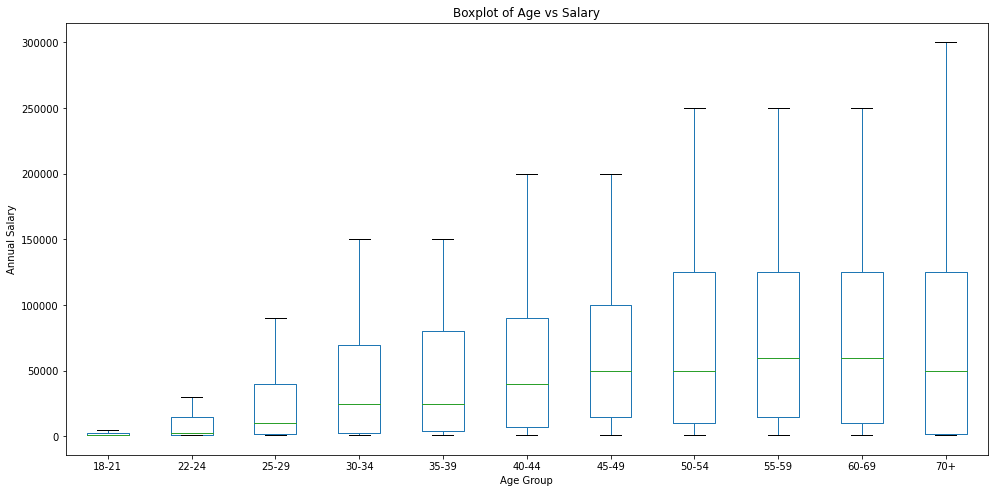

In [4]:
# First Graph, Boxplot of Age vs Salary
plt.figure(figsize=(20,10))
ess_df.boxplot(column='Salary', by='Age', grid=False, showfliers=False, figsize=(16,8))
plt.title("Boxplot of Age vs Salary")
plt.suptitle("")
plt.xlabel("Age Group")
plt.ylabel("Annual Salary")

plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


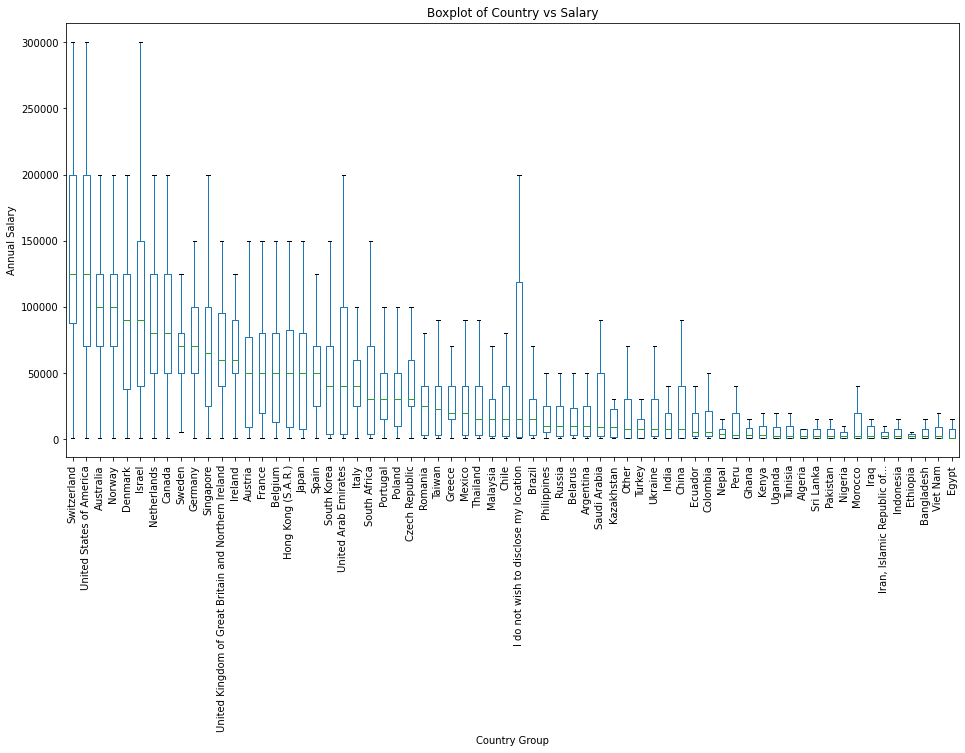

In [5]:
# Second Graph, Boxplot of Country vs Salary
sec_gra_df = ess_df[["Country","Salary"]].copy()
sec_gra_grouped = sec_gra_df.groupby(["Country"])

sec_gra_df2 = pd.DataFrame({col:vals['Salary'] for col,vals in sec_gra_grouped})

# Sort the medians and create a dataframe for it 
meds = sec_gra_df2.median()
meds.sort_values(ascending=False, inplace=True)
sec_gra_df2 = sec_gra_df2[meds.index]

sec_gra_df2.boxplot(grid=False, showfliers=False, figsize=(16,8))
plt.title("Boxplot of Country vs Salary")
plt.suptitle("")
plt.xlabel("Country Group")
plt.ylabel("Annual Salary")
plt.xticks(rotation=90)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


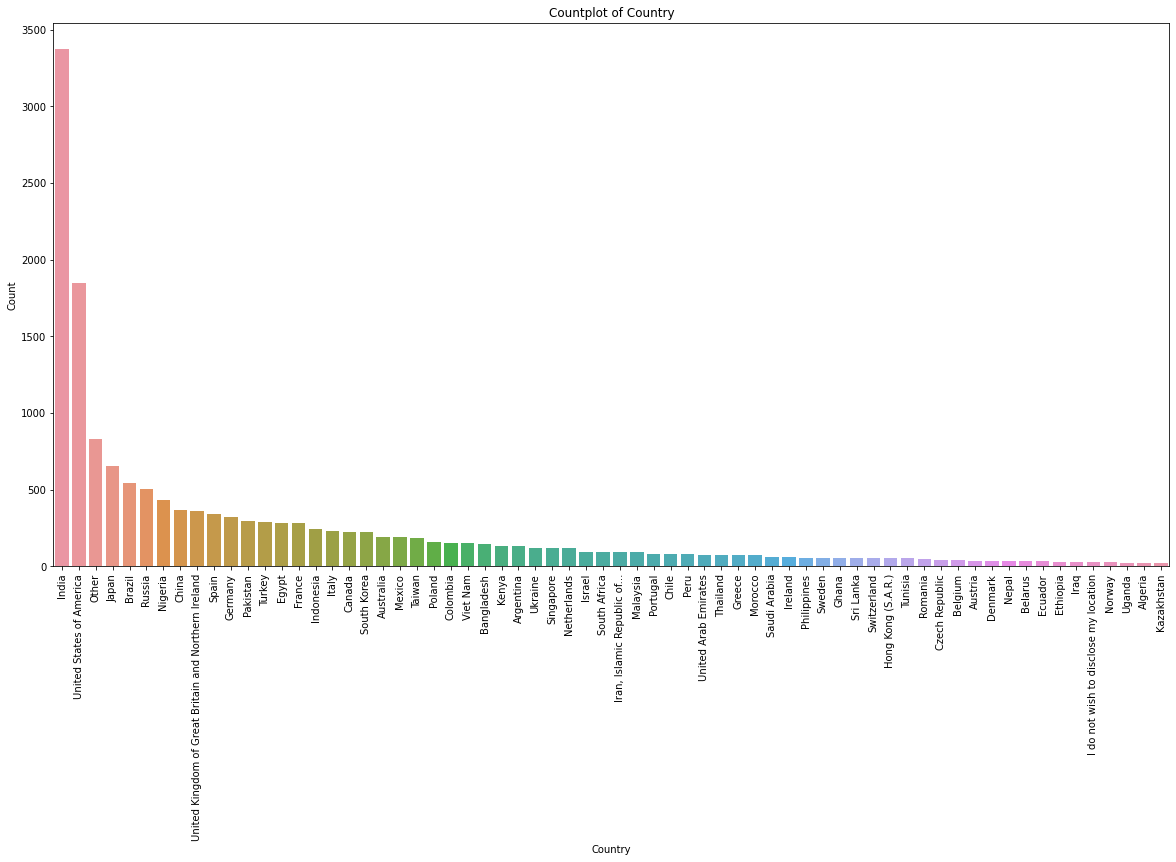

In [6]:
# Third graph, Countplot of Country


plt.figure(figsize=(20,10))
sns.countplot(ess_df.Country, order = ess_df["Country"].value_counts().index)
plt.title("Countplot of Country")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()



# Question 2 (a)

In [7]:
q2_df = ess_df[["Gender","Salary"]].copy()

q2_df.dropna()

q2_df[q2_df["Gender"]=="Man"].describe()



,Salary
count,12642.000000
mean,51193.600696
std,99979.274378
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,60000.000000
max,1000000.000000


In [8]:
q2_df[q2_df["Gender"]=="Woman"].describe()


,Salary
count,2482.000000
mean,34816.881547
std,72017.347888
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,1000000.000000


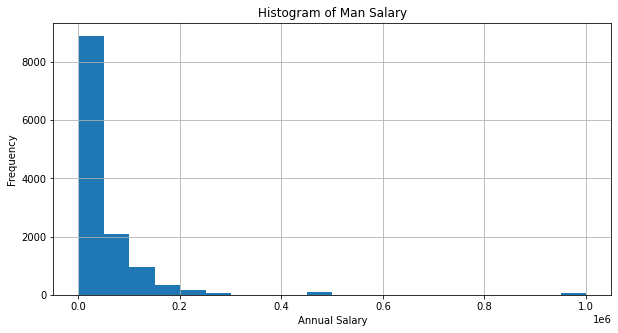

In [9]:
q2_df[q2_df["Gender"]=="Man"].hist(bins=20, figsize=(10,5))
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Man Salary")
plt.show()

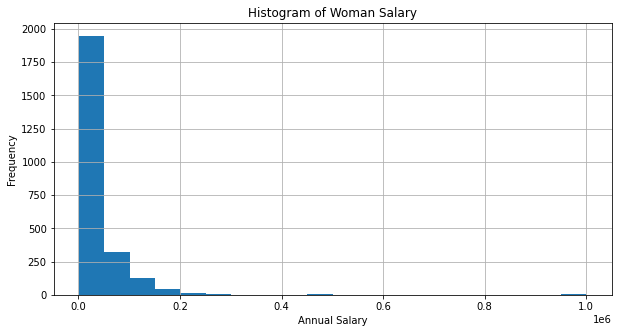

In [10]:
q2_df[q2_df["Gender"]=="Woman"].hist(bins=20, figsize=(10,5))
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Woman Salary")

plt.show()

# Question 2 (b)

In [11]:
woman_sal = q2_df[q2_df['Gender'] == 'Woman']['Salary']
man_sal = q2_df[q2_df['Gender'] == 'Man']['Salary']
tc, pc = stats.ttest_ind(woman_sal, man_sal)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -7.77406  p = 8.08881e-15


# Question 2 (c)

In [12]:
# Use a a function of Cochran formula to determine the sample size of each group

def sample_size(pop_size):
  z = 1.96
  e = 0.05
  p = 0.5
  n = z**2 * p * (1-p) / e**2

  n = n / (1 + (n-1) / pop_size)

  return n


In [13]:
man_sample_size = int(sample_size(len(man_sal)))
woman_sample_size = int(sample_size(len(woman_sal)))

man_samples = []
woman_samples = []
diff_mean_samples = []

# Bootstrap data in 1000 replications
for i in range(1000):
  m_sample = np.random.choice(man_sal, size = man_sample_size, replace=True)
  w_sample = np.random.choice(woman_sal, size = woman_sample_size, replace=True)

  man_samples.append(m_sample.mean())
  woman_samples.append(w_sample.mean())
  diff_mean_samples.append((m_sample.mean()-w_sample.mean()))



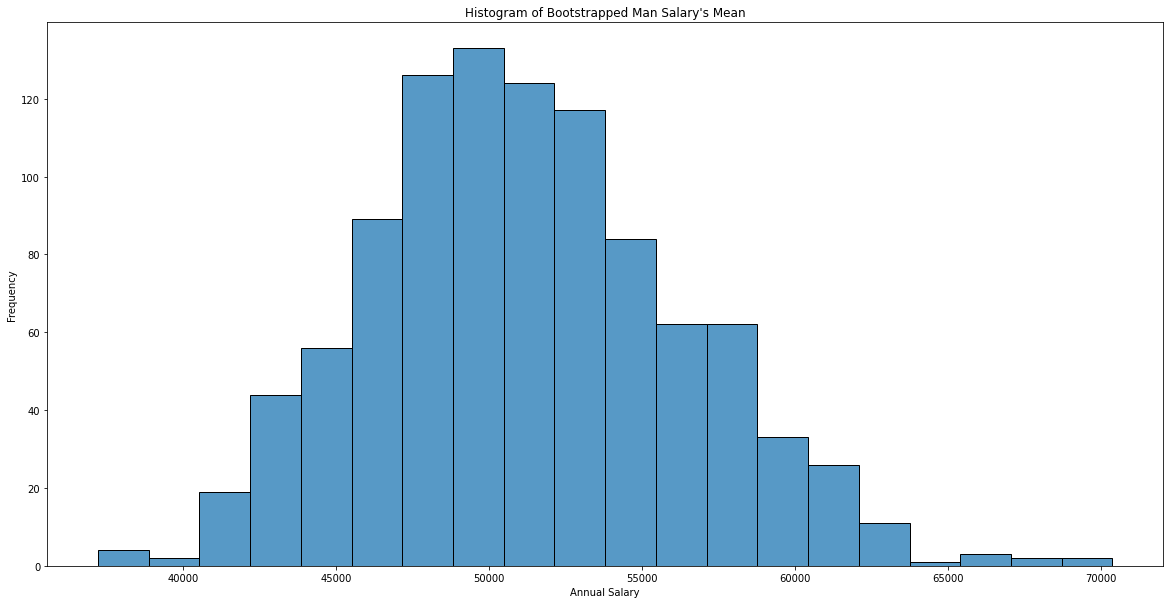

In [14]:
plt.figure(figsize=(20,10))
sns.histplot(man_samples, bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Man Salary's Mean")

plt.show()

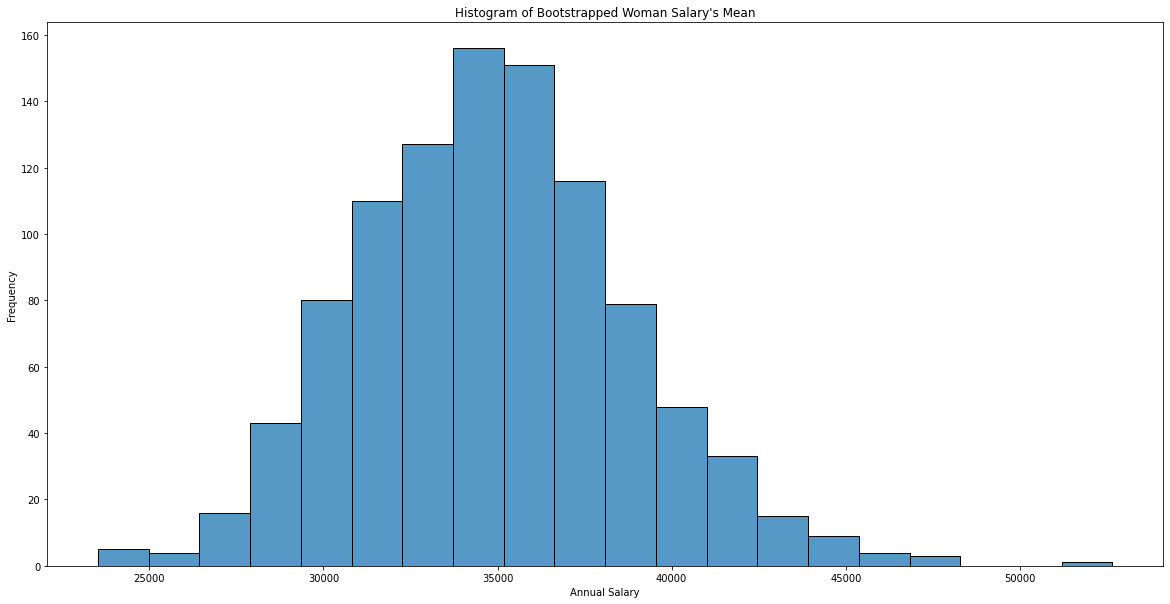

In [15]:
plt.figure(figsize=(20,10))
sns.histplot(woman_samples, bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Woman Salary's Mean")

plt.show()

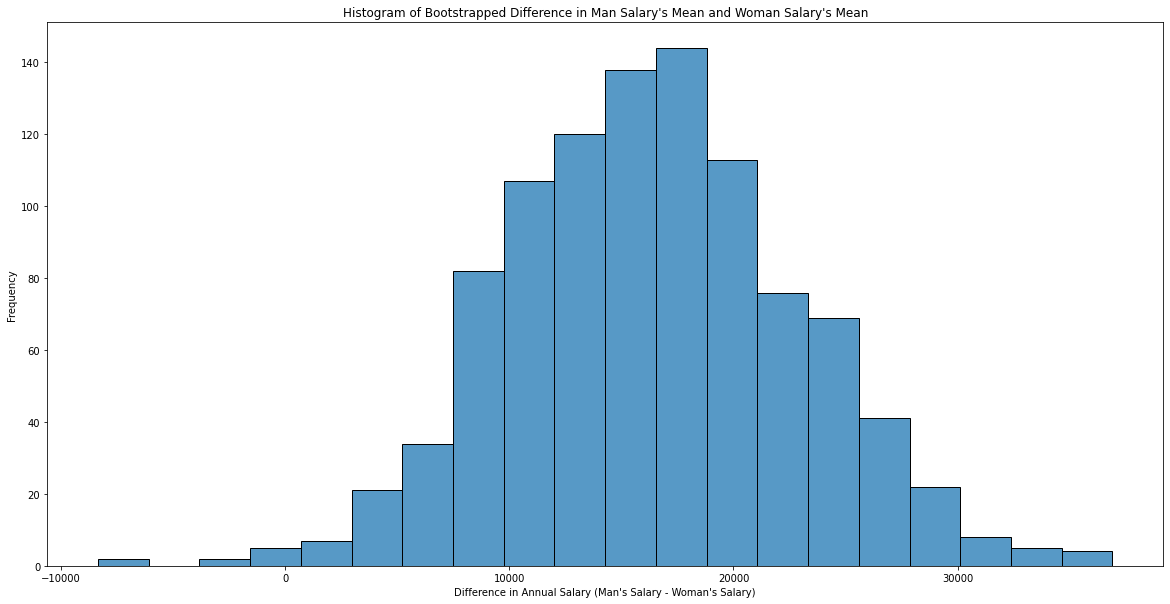

In [16]:
plt.figure(figsize=(20,10))
sns.histplot(diff_mean_samples, bins=20)
plt.xlabel("Difference in Annual Salary (Man's Salary - Woman's Salary)")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Difference in Man Salary's Mean and Woman Salary's Mean")

plt.show()

# Question 2 (d)

In [17]:
tc, pc = stats.ttest_ind(woman_samples, man_samples)
print ("t-test: t = %g  p = %g" % (tc, pc))

t-test: t = -79.9847  p = 0


# Question 2 (e)

Answer on report.

# Question 3 (a)

In [18]:
q3_df = ess_df[["Education","Salary"]].copy()

q3_df.dropna()

q3_df.groupby("Education").describe()



Salary  ...           
                                                     count  ...        max
Education                                                   ...           
Bachelor’s degree                                   4777.0  ...  1000000.0
Doctoral degree                                     2217.0  ...  1000000.0
I prefer not to answer                               334.0  ...  1000000.0
Master’s degree                                     6799.0  ...  1000000.0
No formal education past high school                 228.0  ...  1000000.0
Professional doctorate                               290.0  ...  1000000.0
Some college/university study without earning a...   746.0  ...  1000000.0

[7 rows x 8 columns]

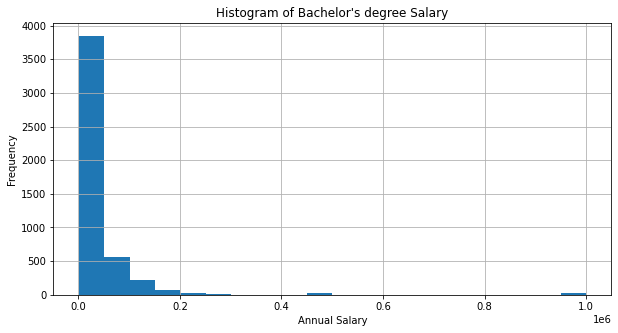

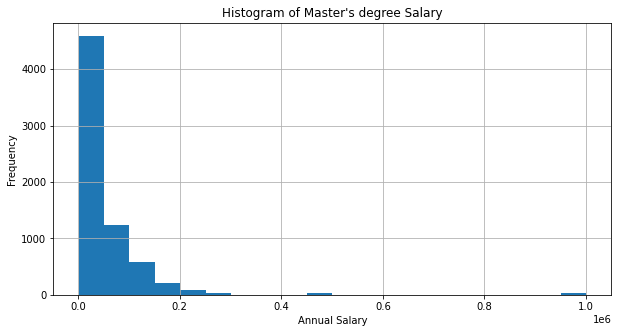

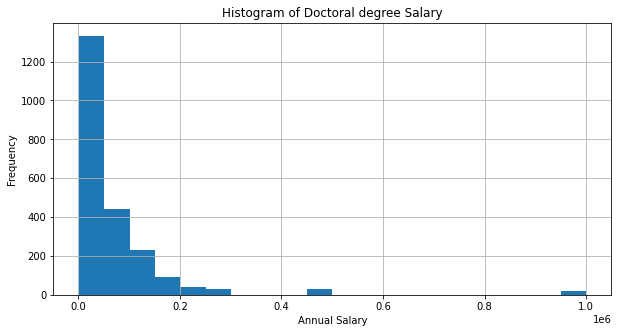

In [19]:
bach_sal = q3_df[q3_df["Education"]=="Bachelor’s degree"]["Salary"]
mast_sal = q3_df[q3_df["Education"]=="Master’s degree"]["Salary"]
doct_sal = q3_df[q3_df["Education"]=="Doctoral degree"]["Salary"]

bach_sal.hist(bins=20, figsize=(10,5))
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bachelor's degree Salary")
plt.show()

mast_sal.hist(bins=20, figsize=(10,5))
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Master's degree Salary")
plt.show()

doct_sal.hist(bins=20, figsize=(10,5))
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Doctoral degree Salary")
plt.show()

# Question 3 (b)

In [20]:
from scipy.stats.mstats_basic import f_oneway

F, p = f_oneway(np.array(bach_sal),np.array(mast_sal),np.array(doct_sal))

print("The p value is {}.".format(p))

The p value is 5.107696325253651e-48.


# Question 3 (c)

In [21]:
bach_sample_size = int(sample_size(len(bach_sal)))
mast_sample_size = int(sample_size(len(mast_sal)))
doct_sample_size = int(sample_size(len(doct_sal)))


bach_samples = []
mast_samples = []
doct_samples = []

diff_mast_bach_samples = []
diff_doct_bach_samples = []
diff_doct_mast_samples = []


# Bootstrap the data in 1000 replications
for i in range(1000):
  b_sample = np.random.choice(bach_sal, size = bach_sample_size, replace=True)
  m_sample = np.random.choice(mast_sal, size = mast_sample_size, replace=True)
  d_sample = np.random.choice(doct_sal, size = doct_sample_size, replace=True)

  bach_samples.append(b_sample.mean())
  mast_samples.append(m_sample.mean()) 
  doct_samples.append(d_sample.mean())

  diff_mast_bach_samples.append((m_sample.mean()-b_sample.mean()))
  diff_doct_bach_samples.append((d_sample.mean()-b_sample.mean()))
  diff_doct_mast_samples.append((d_sample.mean()-m_sample.mean()))



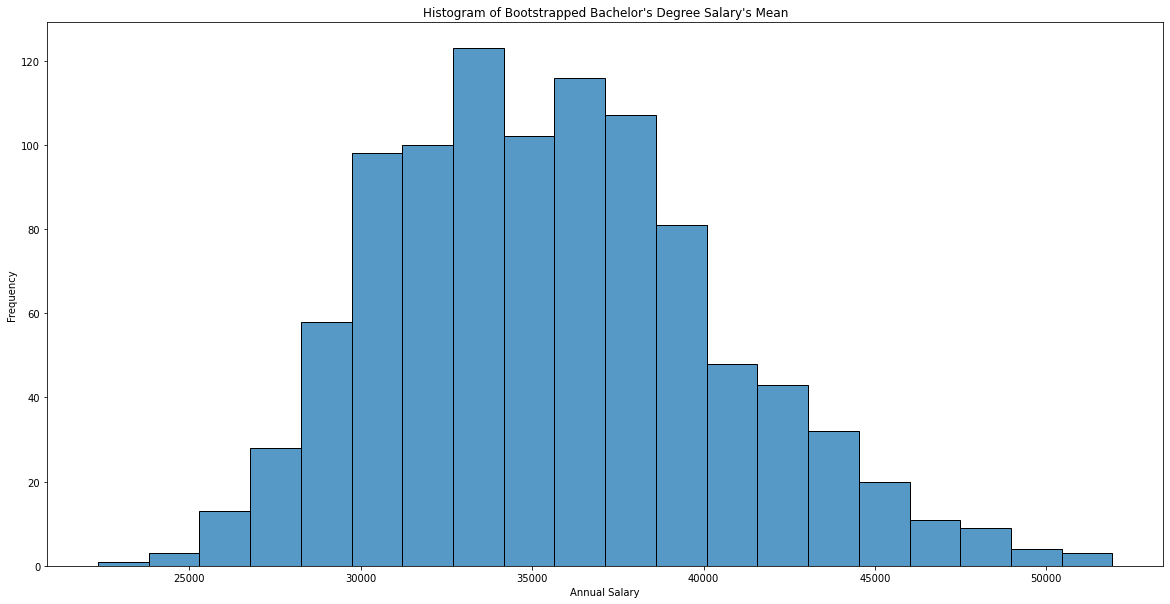

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(bach_samples, bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Bachelor's Degree Salary's Mean")

plt.show()

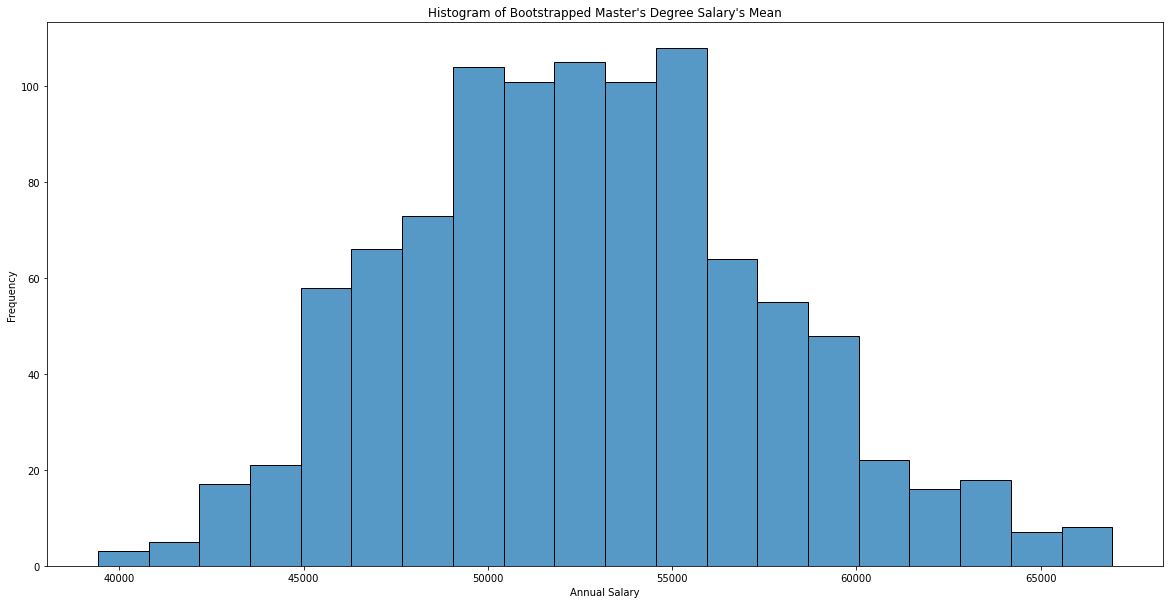

In [23]:
plt.figure(figsize=(20,10))
sns.histplot(mast_samples, bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Master's Degree Salary's Mean")

plt.show()

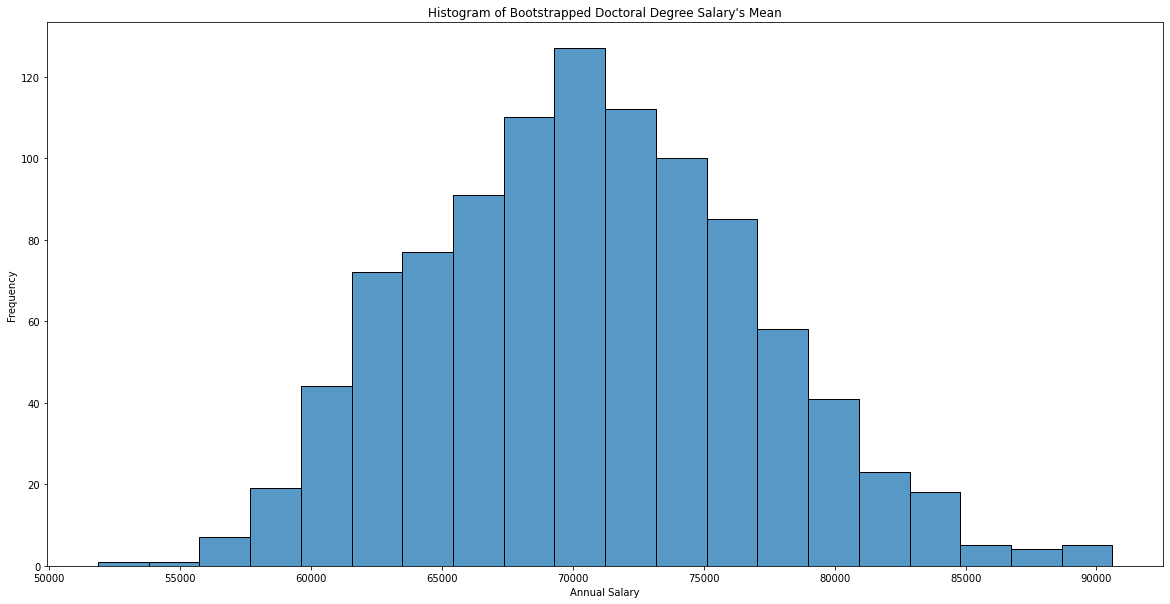

In [24]:
plt.figure(figsize=(20,10))
sns.histplot(doct_samples, bins=20)
plt.xlabel("Annual Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Doctoral Degree Salary's Mean")

plt.show()

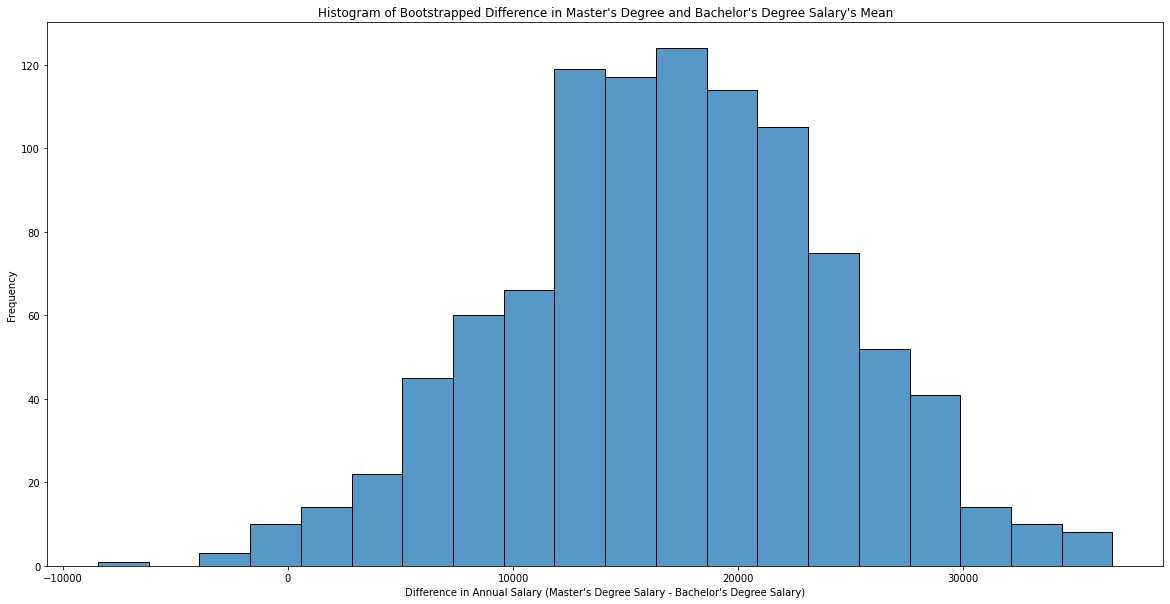

In [25]:
plt.figure(figsize=(20,10))
sns.histplot(diff_mast_bach_samples, bins=20)
plt.xlabel("Difference in Annual Salary (Master's Degree Salary - Bachelor's Degree Salary)")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Difference in Master's Degree and Bachelor's Degree Salary's Mean")

plt.show()

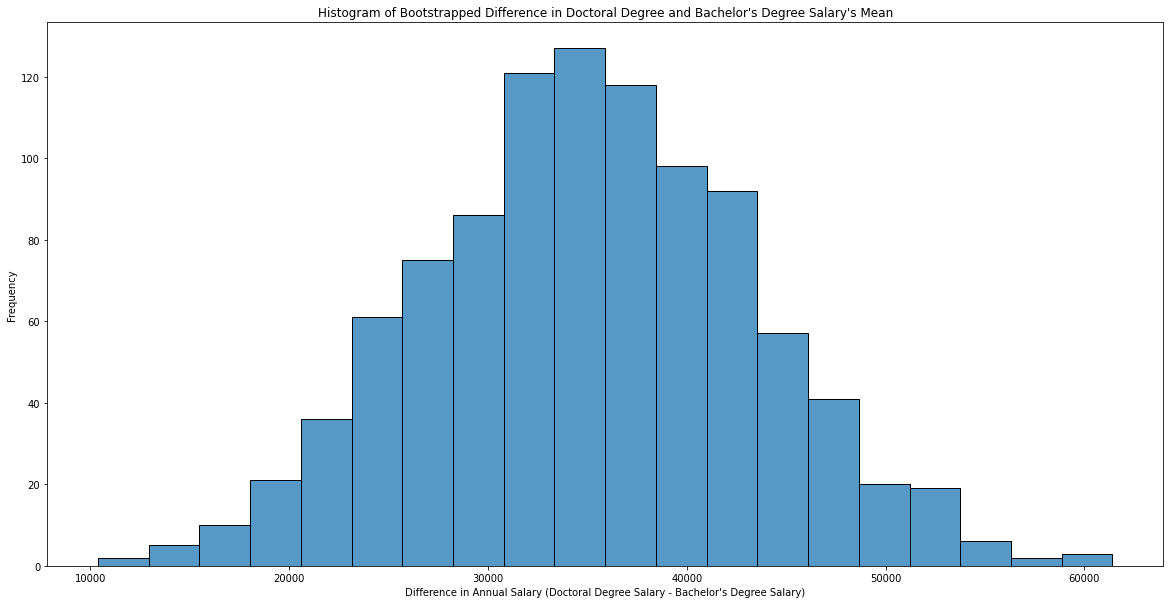

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(diff_doct_bach_samples, bins=20)
plt.xlabel("Difference in Annual Salary (Doctoral Degree Salary - Bachelor's Degree Salary)")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Difference in Doctoral Degree and Bachelor's Degree Salary's Mean")

plt.show()

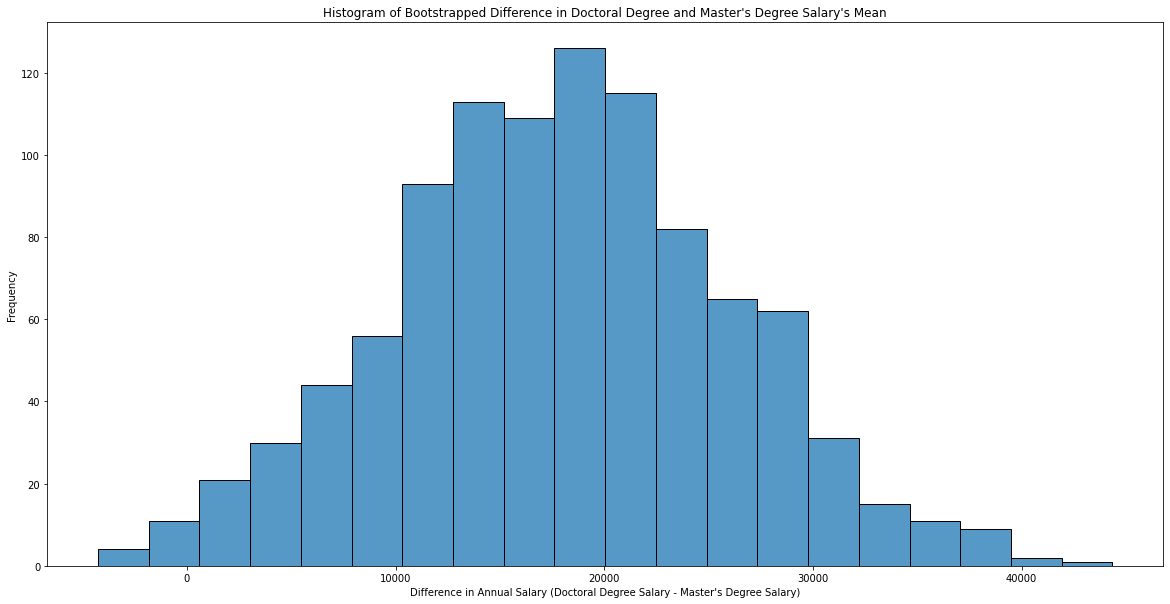

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(diff_doct_mast_samples, bins=20)
plt.xlabel("Difference in Annual Salary (Doctoral Degree Salary - Master's Degree Salary)")
plt.ylabel("Frequency")
plt.title("Histogram of Bootstrapped Difference in Doctoral Degree and Master's Degree Salary's Mean")

plt.show()

# Question 3 (d)

In [28]:
F, p = f_oneway(bach_samples,mast_samples,doct_samples)

print("The p value is {}.".format(p))

The p value is 0.0.


# Question 3 (e)

Answer on report